In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import ipywidgets as widgets
from IPython.display import display

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Hyperparameters & locations
</div>

In [2]:
locs = {'waiting_folder' : 'data/waiting times'}

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Reading the data
</div>

In [3]:
waiting_times = list()
for attraction in tqdm(os.listdir(locs['waiting_folder'])):
    filename = os.path.join(locs['waiting_folder'], attraction)
    df = pd.read_csv(filename)
    if df.empty:
        continue
    df.insert(0, 'attraction', attraction.split('.')[0])
    waiting_times.append(df)

df_wait_raw = pd.concat(waiting_times, ignore_index=True)

100%|██████████| 52/52 [00:08<00:00,  6.31it/s]


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Cleaning the data
</div>

In [4]:
df_wait = df_wait_raw.copy()
# Cleaning the actual waiting times
# Removing outliers from actuals
df_wait = df_wait[((df_wait.SACTMIN >= -1000) & (df_wait.SACTMIN < 360)) | (df_wait.SACTMIN.isnull())]
# Removing outliers from posted (attraction closed at -999)
df_wait = df_wait[(df_wait.SPOSTMIN >= -998.99) | (df_wait.SPOSTMIN.isnull())]

df_wait['date'] = pd.to_datetime(df_wait.date, format = '%m/%d/%Y')
df_wait['datetime'] = pd.to_datetime(df_wait.datetime, format = '%Y-%m-%d %H:%M:%S')

print(f"Removed {len(df_wait_raw) - len(df_wait)} rows")

# You could split the dataset into two seperate dataframes (plusjes & minnetjes :-))
df_wait_act = df_wait[~df_wait.SACTMIN.isnull()].drop('SPOSTMIN', axis = 1)
df_wait_post = df_wait[~df_wait.SPOSTMIN.isnull()].drop('SACTMIN', axis = 1)

attractions = df_wait.attraction.unique()

Removed 1318703 rows


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Visualizing the data that we have in a very simple way
</div>

In [5]:
df_wait_post.groupby('attraction')['SPOSTMIN'].describe()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
7_dwarfs_train,290934.0,76.962455,33.993364,0.0,50.0,70.0,95.0,300.0
alien_saucers,121772.0,29.863351,15.998896,0.0,20.0,30.0,40.0,190.0
astro_orbiter,274923.0,27.026822,13.458805,0.0,20.0,25.0,35.0,180.0
barnstormer,286649.0,19.227069,14.330115,0.0,5.0,15.0,25.0,120.0
big_thunder_mtn,274544.0,37.630817,23.339693,0.0,20.0,35.0,50.0,300.0
buzz_lightyear,296459.0,31.639333,19.493587,0.0,15.0,30.0,45.0,160.0
carousel_of_progress,36096.0,6.333389,3.586248,0.0,5.0,5.0,5.0,80.0
country_bears,10691.0,14.968665,8.613217,0.0,10.0,10.0,20.0,45.0
dinosaur,228624.0,27.399704,19.630231,0.0,10.0,20.0,40.0,300.0


In [6]:
df_wait_act.groupby('attraction')['SACTMIN'].describe()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
7_dwarfs_train,7634.0,36.166623,22.950125,0.0,21.0,31.0,46.00,217.0
alien_saucers,3031.0,22.068624,12.586751,0.0,13.0,21.0,30.00,79.0
astro_orbiter,1770.0,20.402260,9.501468,0.0,14.0,20.0,26.00,65.0
barnstormer,3087.0,12.528345,9.900399,0.0,5.0,11.0,18.00,70.0
big_thunder_mtn,11729.0,18.251513,12.913191,0.0,9.0,16.0,25.00,125.0
buzz_lightyear,7998.0,14.120780,12.355926,0.0,5.0,11.0,20.00,109.0
carousel_of_progress,876.0,4.179224,4.455348,0.0,1.0,2.0,6.00,33.0
country_bears,362.0,7.842541,7.213412,0.0,2.0,6.0,11.00,40.0
dinosaur,5059.0,20.197075,15.332370,0.0,8.0,17.0,29.00,96.0


In [7]:
# Create a dropdown widget for selecting attractions
attraction_dropdown = widgets.Dropdown(
    options=attractions,
    description='Attraction:',
    value=attractions[0]  # Default value
)

# Function to update the plot based on selected attraction
def update_plot(attraction):
    plt.figure(figsize=(12, 4))  # Create a new figure
    plt.subplot(1, 2, 1)  # First subplot
    df_wait_attraction = df_wait.query("attraction == @attraction")
    df_wait_attraction.SACTMIN.plot.hist(bins=30, title='Actual waiting times')
    
    plt.subplot(1, 2, 2)  # Second subplot
    df_wait_attraction.SPOSTMIN.plot.hist(bins=np.arange(-2.5, df_wait.SPOSTMIN.max() + 2.5, 10), title='Posted waiting times')
    
    plt.tight_layout()

# Link the dropdown to the update function
interactive_plot = widgets.interactive(update_plot, attraction=attraction_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Attraction:', options=('7_dwarfs_train', 'alien_saucers', 'astro_o…

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Team 1 - sessie 1
</div>

<Axes: xlabel='attraction'>

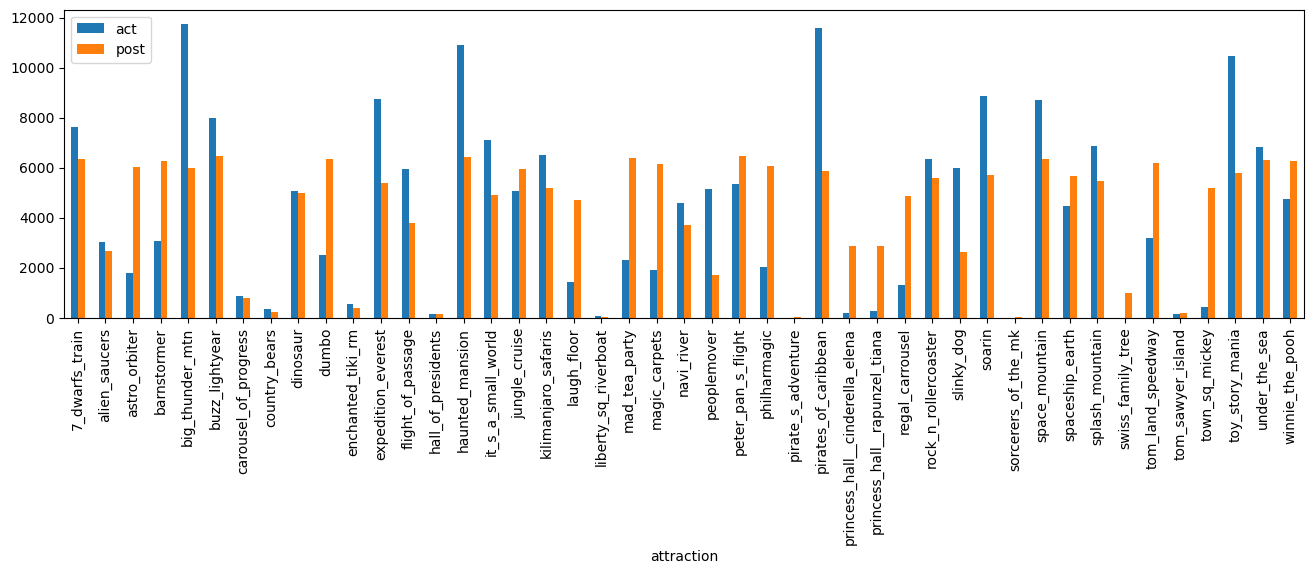

In [8]:
fig, ax = plt.subplots(figsize = (16, 4))
pd.DataFrame({'act' : df_wait_act.groupby('attraction')['SACTMIN'].describe()['count'],
                    'post' : df_wait_post.groupby('attraction')['SPOSTMIN'].describe()['count'] * len(df_wait_act) / len(df_wait_post) }).plot.bar(ax = ax)

In [9]:
pd.DataFrame({'act' : df_wait_act.groupby('attraction')['SACTMIN'].describe()['count'],
                    'post' : df_wait_post.groupby('attraction')['SPOSTMIN'].describe()['count'] * len(df_wait_act) / len(df_wait_post) })

,act,post
attraction,,
7_dwarfs_train,7634.0,6363.518115
alien_saucers,3031.0,2663.484941
astro_orbiter,1770.0,6013.313984
barnstormer,3087.0,6269.793507
big_thunder_mtn,11729.0,6005.024223
buzz_lightyear,7998.0,6484.364896
carousel_of_progress,876.0,789.517725
country_bears,362.0,233.841257
dinosaur,5059.0,5000.628890


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Team 3 - sessie 1
</div>

In [10]:
# Extract "minutes from df_wait" from the datetime column
df_wait_post['minute'] = df_wait_post['datetime'].dt.hour * 60 + df_wait_post['datetime'].dt.minute

<Axes: xlabel='minute'>

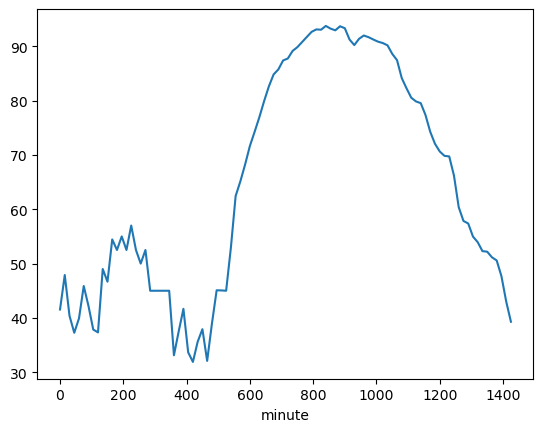

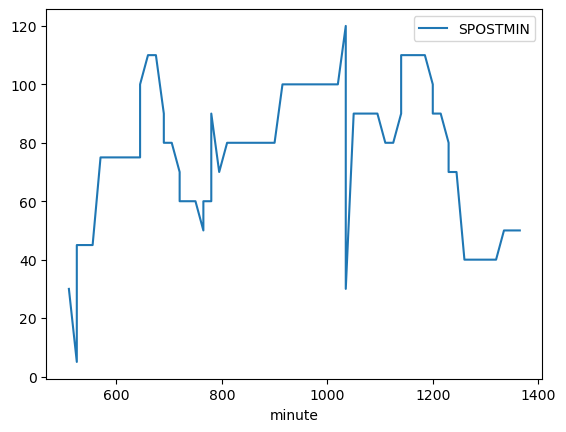

In [37]:
attraction = '7_dwarfs_train'

# Optie 1: gewoon gemiddelde per minuut, issue is dat je een te glad patroon krijgt van een dag die eigenlijk nooit zal gebeuren
df_wait_post['minute'] = 15 * (df_wait_post.minute // 15).astype(int)
df_wait_post.query("attraction == @attraction").groupby('minute')['SPOSTMIN'].mean().plot()

# Bereken de dag met de mediane gemiddelde wchttijd & toon die dag
df_wait_per_day = df_wait_post.query("attraction == @attraction").groupby('date')['SPOSTMIN'].mean().sort_values()
date_median = df_wait_per_day.iloc[[len(df_wait_per_day) // 2 + 1]].index[0]
df_wait_post.query("attraction == @attraction & date == @date_median").plot(x = 'minute', y = 'SPOSTMIN')

Timestamp('2021-01-17 00:00:00')

C:\Users\timh\AppData\Local\Temp\ipykernel_20084\1122840669.py:25: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  attraction_data = df_selected[df_selected['attraction'] == 'buzz_lightyear'].query("date == @date").sort_values(by = 'minute')


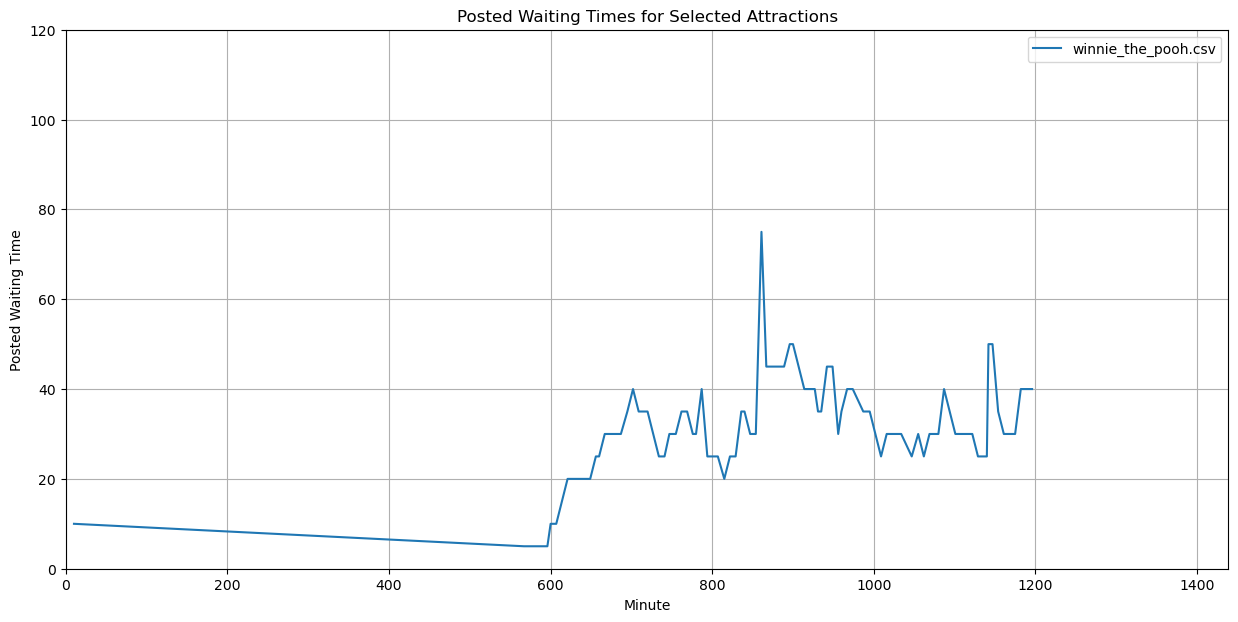

In [12]:
# Filter for specific attractions
selected_attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion', '7_dwarfs_train']
df_selected = df_wait_post[df_wait_post['attraction'].isin(selected_attractions)]
df_selected.head(10)
avg_waits = (
    df_selected
    .groupby(['attraction', 'minute'])
    .agg({'SPOSTMIN': 'mean'})
    .reset_index()
)

# Create the plot
plt.figure(figsize=(15, 7))

#Plot each attraction's waiting times
# for attraction in selected_attractions:
#     attraction_data = df_selected[df_selected['attraction'] == attraction]
#     plt.plot(
#         attraction_data['minute'], 
#         attraction_data['SPOSTMIN'], 
#         label=attraction
#     )

date = '08/01/2015'
attraction_data = df_selected[df_selected['attraction'] == 'buzz_lightyear'].query("date == @date").sort_values(by = 'minute')
plt.plot(
    attraction_data['minute'], 
    attraction_data['SPOSTMIN'], 
    label=attraction
)

plt.title('Posted Waiting Times for Selected Attractions')
plt.xlabel('Minute')
plt.ylabel('Posted Waiting Time')
plt.yticks(range(0, int(avg_waits['SPOSTMIN'].max()) + 20, 20))
plt.xlim(0, avg_waits['minute'].max())
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Hoe ziet een gewone dag voor 7 dwarfs train eruit?
</div>


In [13]:
df

,attraction,date,datetime,SACTMIN,SPOSTMIN
0,winnie_the_pooh,01/01/2015,2015-01-01 07:09:12,NaN,5.0
1,winnie_the_pooh,01/01/2015,2015-01-01 07:16:12,NaN,5.0
2,winnie_the_pooh,01/01/2015,2015-01-01 07:23:12,NaN,5.0
3,winnie_the_pooh,01/01/2015,2015-01-01 07:29:12,NaN,5.0
4,winnie_the_pooh,01/01/2015,2015-01-01 07:37:12,NaN,5.0
...,...,...,...,...,...
312139,winnie_the_pooh,12/28/2021,2021-12-28 22:34:35,NaN,5.0
312140,winnie_the_pooh,12/28/2021,2021-12-28 22:42:15,NaN,5.0
312141,winnie_the_pooh,12/28/2021,2021-12-28 22:48:12,NaN,5.0
312142,winnie_the_pooh,12/28/2021,2021-12-28 22:54:10,NaN,5.0


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 1: Isabel, druktekalender van de geschiedenis
</div>

1. Restringeer tot "interessante attracties".
2. De data interpoleren/voorspellen op elke dag van de dataset voor alle interessante attracties op een gemeenschappelijke x-as, bvb elke 30 minuten. Hier enkel projected.
3. Group dag & bereken de gemiddelde wachttijd. Hier enkel projected.
4. Plaats dit in een overzichtje. Hier enkel projected.
5. One step beyond: vertaal projected waiting times naar actual met een correctiefactor of fancier (hoe bereken je die correctiefator?) Of ook: naar de toekomst

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 2: Peter, Dagschema voor bezoekers
</div>

1. Restringeer tot "interessante attracties".
2. De data interpoleren/voorspellen op elke dag van de dataset voor alle interessante attracties op een gemeenschappelijke x-as, bvb elke 30 minuten. Hier enkel projected.
3. Kies een specifieke dag en veronderstel (of input) een aankomstuur
4. Maak een itinerary voor deze persoon met greedy approach: telkens de attractie met kleinste wachttijd

Interessanter maken:
- Elke attractie maar `n` keer (bvb `n =1`).
- Preferences (type attracties die je leuk vindt, attracties die je zeker gedaan wil hebben)
- Niet enkel historisch maar ook naar de toekomst.
- Niet enkel greedy maar echte discrete optimalizatie
- (benaderende) wandeltijden
- Fast pass optimalizatie 

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 3: Lore, Posted waiting times verbeteren
</div>

1. Analyze van de accuracy van de huidige posted waiting times (zie eerste opdracht).
2. Nieuwe posted waiting times maken op basis van de oude, heel simpel: schalingfactor toevoegen met gemiddelde ratio actual vs posted. More difficult: modelletje maken dat posted waiting time en wat tijdsinfo neem en actual uitspeekt

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 4: Stijn, slagen die actuals wel op iets !?
</div>

Grondige data analyze van de actuals. Ihb zoeken naar outliers voor punten die eventueel totaal verkeerd liggen (maar wat zijn outliers hier?)

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 5: Masha, Zijn er genoeg attracties met magic hours, of zijn de magic hours attracties over-populated op de uren dat ze "alleen" open zijn?
</div>


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 6: Tim, Naar pretpark gaan dag voorstellen
</div>

1. De rustigste dag?
2. Gerestringeerd tot bepaalde voorwaarden mbt dagen
3. Met preferenties van mezelf

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 7: Wim, stomme attractie barometer
</div>

Zijn er attracties niet meer voldoende attractief

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 8: Wim 2, leuke attractie barometer
</div>

Zijn er attracties te attractief & moeten we er zo nieuwe maken van dezelfde soort? Gerelateerd: welk type attracties moeten we evt bijmaken?

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 9: Stijn, Interarrival time between 2 rides
</div>

Ook iets melden over de tijd tussen 2 karretjes of dit meenemen in je predictie?

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 10: Stijn, correcte prijs fastpass
</div>

Als DIsney world: prijszetting, als klant: keuze om al dan niet een fastpass te kopen (is it worth it, Hermiony) It's not worth it Hermiony!

In [49]:
import datetime

In [44]:
attraction = '7_dwarfs_train'

# Stap 1: alles met minder dan 32 datapunten gooi ik eruit
df_wait_post_attr = df_wait_post.query("attraction == @attraction").copy()
lower_bound_enough = 2 * 16
dates_with_data = df_wait_post_attr.groupby('date').size()[(df_wait_post_attr.groupby('date').size() > lower_bound_enough)].index
df_wait_post_attr = df_wait_post_attr.query("date in @dates_with_data")
df_wait_post_attr.groupby('date').size().min()

37

In [128]:
from tqdm import tqdm
groups = list()
for date, group in tqdm(list(df_wait_post_attr.groupby('date'))):
    time_shifted = group.datetime - datetime.timedelta(hours = 3)
    group['minute'] = 3 * 60 + time_shifted.dt.hour * 60 + time_shifted.dt.minute

    # Average out duplicate minutes
    group = group.drop(['datetime', 'attraction', 'date'], axis = 1).groupby(['minute'])['SPOSTMIN'].mean().reset_index()

    new_index = np.arange(0, 27 * 60 + 1, 30)  # Range from 0 to 1620 with a step of 30

    # Step 2: Reindex the DataFrame
    # Set the 'minute' column as the index
    group = group.set_index('minute')

    # Step 3: Reindex to the new index and interpolate
    resampled = group.reindex(np.unique(np.concatenate([new_index, group.index]))).interpolate(method='linear')
    resampled = resampled.loc[new_index]

    # Step 4: Add zeros at the endpoints
    #resampled.loc[0] = 0  # Set the first value to zero
    #resampled.loc[1620] = 0  # Set the last value to zero

    # Step 5: Reset index if needed
    resampled = resampled.reset_index()

    resampled['SPOSTMIN'] = resampled['SPOSTMIN'].fillna(0)
    resampled['SPOSTMIN'] = (resampled['SPOSTMIN'] + 2.5) // 5 * 5
    resampled.insert(0, 'date', date)
    resampled.insert(0, 'attraction', attraction)
    groups.append(resampled)

100%|██████████| 2308/2308 [00:05<00:00, 433.80it/s]


In [131]:
df_netjes = pd.concat(groups, ignore_index=True)

C:\Users\timh\AppData\Local\Temp\ipykernel_19276\76051887.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_netjes.query("date == '2017-07-12'").plot(x = 'minute', y = 'SPOSTMIN', marker = 'o')


<Axes: xlabel='minute'>

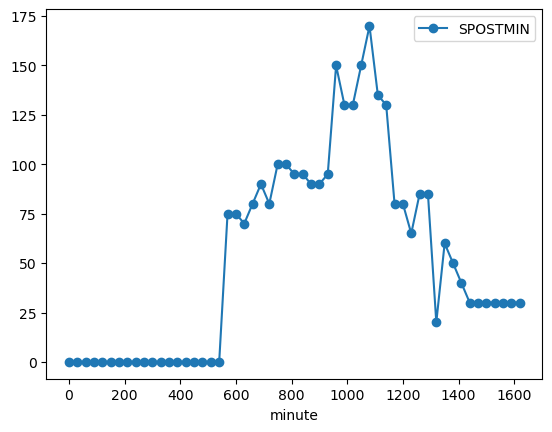

In [136]:
df_netjes.query("date == '2017-07-12'").plot(x = 'minute', y = 'SPOSTMIN', marker = 'o')